In [1]:
# single-cell analysis package
library(Seurat)

# plotting and data science packages
library(tidyverse)
library(cowplot)
library(patchwork)

# co-expression network analysis packages:
library(WGCNA)
library(hdWGCNA)

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.12.0-CAPI-1.18.0 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 


Attaching SeuratObject

Attaching sp

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr    

In [2]:
# using the cowplot theme for ggplot
theme_set(theme_cowplot())

# set random seed for reproducibility
set.seed(12345)

# optionally enable multithreading
enableWGCNAThreads(nThreads = 64)

Allowing parallel execution with up to 64 working processes.


In [3]:
# load the Zhou et al snRNA-seq dataset
seurat_obj <- readRDS('/home/mowp/test/data/Zhou_2020.rds')

In [4]:
seurat_obj

An object of class Seurat 
36601 features across 36671 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 2 dimensional reductions calculated: harmony, umap

In [4]:
Embeddings(object = seurat_obj, reduction = "harmony") %>% head

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,⋯,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49
AGTCTTTGTTGATTCG-11,-7.025700,-1.028285,20.41853,7.9622817,0.6635104,-3.5588408,-0.5953361,-10.117324,2.746088,0.30862895,⋯,0.9353009,-0.8062578,-0.187352700,0.02478804,0.5912723,-3.1595187,2.7060719,-3.65530200,4.2991166,-0.7646318
AGCAGCCTCCAGATCA-11,-6.520386,-2.497318,25.21489,3.0901608,2.4618614,-4.3608210,-0.8143716,-9.988091,3.379556,-0.82912860,⋯,1.6551281,-2.1096401,-1.352146100,-0.88157850,-0.5662793,-1.0161730,2.4642391,-0.02158759,0.6914609,-0.6189025
CTTAGGATCTCATTCA-11,-7.343407,-1.706159,21.81742,0.5281867,0.2329506,-4.2692310,0.4366355,-11.804960,3.417494,0.02069058,⋯,2.1526723,-0.8338196,-0.182134610,-4.05532700,-0.9917687,-3.3135710,0.6110700,-0.60273480,1.1993222,-1.1840453
AACTCAGAGGAATGGA-11,-7.475650,-1.701373,12.47671,-16.7285270,-2.6209266,1.5497494,-3.4411933,-1.777312,10.235521,4.30427400,⋯,-1.9017996,0.6534774,0.717439300,2.77950570,-0.3752083,-0.5773683,0.1495741,-1.15465760,1.7421279,0.2928495
ACGAGGAGTCTCCACT-11,-6.738589,-2.069130,12.99905,-10.0200080,-2.8903770,0.3386695,-2.4505482,-4.740154,4.691283,2.03838750,⋯,-0.2583147,-1.0094170,0.004000641,-0.66147286,-0.9914302,-0.4158461,-0.3358048,-1.05983750,1.7716384,-0.8108176
ACTTACTTCGGAGCAA-11,-6.727676,-2.413184,22.57157,-2.9600697,1.4795532,-1.9517466,-2.2432153,-10.354218,6.351859,3.24296950,⋯,0.1344654,1.1024396,0.746052560,-3.06723520,-3.3867030,-5.3557897,2.0359688,1.37116630,3.1210644,-1.6694181


In [5]:
dim(Embeddings(object = seurat_obj, reduction = "harmony"))  # get the embeddings from the Seurat object

[1] 36671    50

In [6]:
head(seurat_obj[[]])

,orig.ident,nCount_RNA,nFeature_RNA,orig_barcode,n_counts,doublet_scores,doublets,Sample,Study,batch,⋯,total_counts,log1p_total_counts,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,leiden,cell_type,annotation,UMAP_1,UMAP_2
,<fct>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>
AGTCTTTGTTGATTCG-11,Zhou_2020,52105,8876,AGTCTTTGTTGATTCG,52105,0.1079646,Singlet,C1,Zhou_2020,11,⋯,52105,10.86103,916,6.821107,1.7579887,23,EX,EX9,13.01274,9.718221
AGCAGCCTCCAGATCA-11,Zhou_2020,52011,8807,AGCAGCCTCCAGATCA,52011,0.0984975,Singlet,C1,Zhou_2020,11,⋯,52011,10.85923,1635,7.400010,3.1435657,15,EX,EX4,16.46789,15.904092
CTTAGGATCTCATTCA-11,Zhou_2020,51777,8640,CTTAGGATCTCATTCA,51777,0.1131387,Singlet,C1,Zhou_2020,11,⋯,51777,10.85472,1354,7.211557,2.6150606,15,EX,EX4,16.55658,15.861042
AACTCAGAGGAATGGA-11,Zhou_2020,51717,7199,AACTCAGAGGAATGGA,51717,0.1131387,Singlet,C1,Zhou_2020,11,⋯,51717,10.85356,321,5.774551,0.6206856,20,EX,EX7,10.56670,8.750896
ACGAGGAGTCTCCACT-11,Zhou_2020,51484,7702,ACGAGGAGTCTCCACT,51484,0.1186441,Singlet,C1,Zhou_2020,11,⋯,51484,10.84905,645,6.470799,1.2528164,23,EX,EX9,13.33197,9.003313
ACTTACTTCGGAGCAA-11,Zhou_2020,50974,7799,ACTTACTTCGGAGCAA,50974,0.1375000,Singlet,C1,Zhou_2020,11,⋯,50974,10.83909,1285,7.159292,2.5208929,16,EX,EX5,11.91001,11.625672


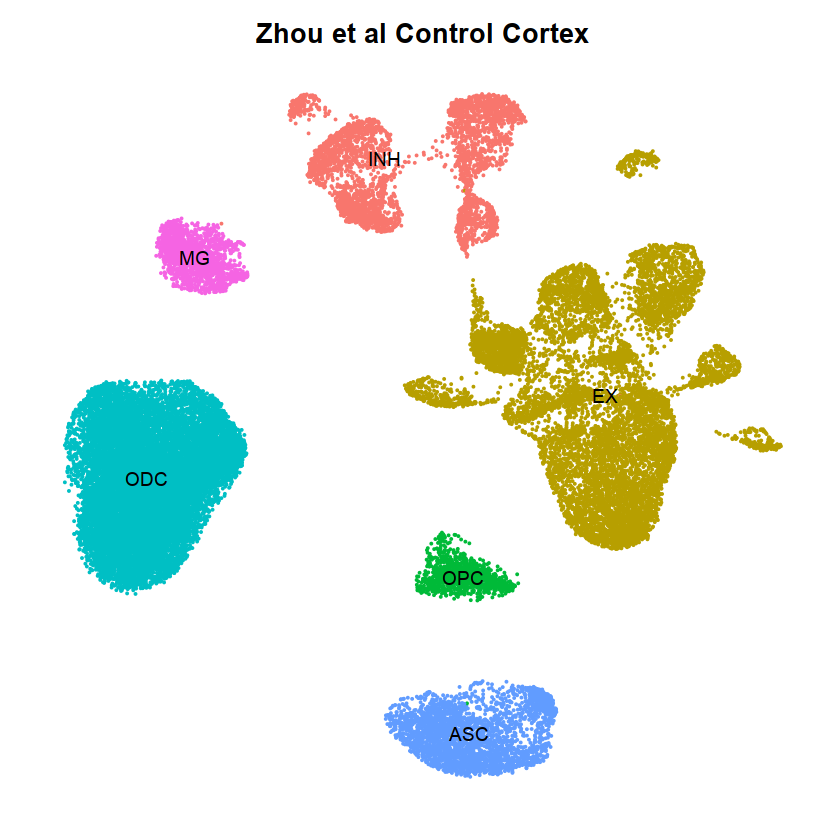

In [7]:
DimPlot(seurat_obj, group.by='cell_type', label=TRUE) +
   umap_theme() + ggtitle('Zhou et al Control Cortex') + NoLegend()

选择了至少在5%的细胞中表达的基因（3857个），并将hdWGCNA experiment 命名为 “tutorial”

In [9]:
seurat_obj <- SetupForWGCNA(
  seurat_obj,
  gene_select = "fraction", # the gene selection approach
  fraction = 0.05, # fraction of cells that a gene needs to be expressed in order to be included
  wgcna_name = "tutorial" # the name of the hdWGCNA experiment
)

In [13]:
seurat_obj@misc

$active_wgcna
[1] "tutorial"

$tutorial
$tutorial$wgcna_genes
    [1] "AL627309.1"        "LINC01409"         "LINC01128"        
    [4] "NOC2L"             "AGRN"              "C1orf159"         
    [7] "SDF4"              "UBE2J2"            "SCNN1D"           
   [10] "ACAP3"             "INTS11"            "DVL1"             
   [13] "MXRA8"             "AURKAIP1"          "CCNL2"            
   [16] "MRPL20"            "ANKRD65"           "VWA1"             
   [19] "ATAD3B"            "ATAD3A"            "SSU72"            
   [22] "AL691432.2"        "MIB2"              "CDK11B"           
   [25] "SLC35E2B"          "CDK11A"            "SLC35E2A"         
   [28] "NADK"              "GNB1"              "CFAP74"           
   [31] "GABRD"             "PRKCZ"             "FAAP20"           
   [34] "SKI"               "MORN1"             "RER1"             
   [37] "PEX10"             "PLCH2"             "PANK4"            
   [40] "TNFRSF14"          "PRDM16"            "AL513320.1"       
   [43] "TPRG1L"            "WRAP73"            "LRRC47"           
   [46] "CEP104"            "DFFB"              "C1orf174"         
   [49] "AJAP1"             "NPHP4"             "KCNAB2"           
   [52] "CHD5"              "RPL22"             "RNF207"           
   [55] "ICMT"              "ACOT7"             "TNFRSF25"         
   [58] "PLEKHG5"           "NOL9"              "ZBTB48"           
   [61] "KLHL21"            "PHF13"             "THAP3"            
   [64] "DNAJC11"           "CAMTA1"            "VAMP3"            
   [67] "PER3"              "PARK7"             "ERRFI1"           
   [70] "SLC45A1"           "RERE"              "ENO1"             
   [73] "SLC2A5"            "MIR34AHG"          "H6PD"             
   [76] "SPSB1"             "SLC25A33"          "TMEM201"          
   [79] "PIK3CD"            "CLSTN1"            "CTNNBIP1"         
   [82] "LZIC"              "NMNAT1"            "UBE4B"            
   [85] "KIF1B"             "AL139424.3"        "PGD"              
   [88] "CENPS"             "DFFA"              "PEX14"            
   [91] "TARDBP"            "AL109811.2"        "SRM"              
   [94] "EXOSC10"           "MTOR"              "UBIAD1"           
   [97] "DISP3"             "FBXO2"             "FBXO44"           
  [100] "MAD2L2"            "MTHFR"             "CLCN6"            
  [103] "KIAA2013"          "PLOD1"             "MFN2"             
  [106] "MIIP"              "VPS13D"            "DHRS3"            
  [109] "PRDM2"             "KAZN"              "EFHD2"            
  [112] "CELA2B"            "CASP9"             "DNAJC16"          
  [115] "DDI2"              "PLEKHM2"           "AL450998.2"       
  [118] "SPEN"              "ZBTB17"            "FBXO42"           
  [121] "SZRD1"             "NECAP2"            "LINC01772"        
  [124] "NBPF1"             "CROCC"             "ATP13A2"          
  [127] "SDHB"              "PADI2"             "RCC2"             
  [130] "ARHGEF10L"         "IGSF21"            "IFFO2"            
  [133] "UBR4"              "EMC1-AS1"          "EMC1"             
  [136] "MRTO4"             "AKR7A2"            "SLC66A1"          
  [139] "CAPZB"             "MICOS10"           "NBL1"             
  [142] "OTUD3"             "CAMK2N1"           "MUL1"             
  [145] "PINK1"             "DDOST"             "KIF17"            
  [148] "SH2D5"             "HP1BP3"            "EIF4G3"           
  [151] "ECE1"              "NBPF3"             "RAP1GAP"          
  [154] "USP48"             "CDC42"             "ZBTB40"           
  [157] "EPHB2"             "KDM1A"             "AL031428.1"       
  [160] "LUZP1"             "LINC01355"         "AL109936.6"       
  [163] "HNRNPR"            "ZNF436"            "ZNF436-AS1"       
  [166] "ASAP3"             "RPL11"             "ELOA-AS1"         
  [169] "PITHD1"            "LYPLA2"            "GALE"             
  [172] "HMGCL"             "FUCA1"             "PNRC2"       

In [10]:
# construct metacells  in each group
seurat_obj <- MetacellsByGroups(
  seurat_obj = seurat_obj,
  group.by = c("cell_type", "Sample"), # specify the columns in seurat_obj@meta.data to group by
  reduction = 'harmony', # select the dimensionality reduction to perform KNN on
  k = 25, # nearest-neighbors parameter
  max_shared = 10, # maximum number of shared cells between two metacells
  ident.group = 'cell_type' # set the Idents of the metacell seurat object
)

# normalize metacell expression matrix:
seurat_obj <- NormalizeMetacells(seurat_obj)

Warning message in MetacellsByGroups(seurat_obj = seurat_obj, group.by = c("cell_type", :
“Removing the following groups that did not meet min_cells: ASC#C4, MG#C2, MG#C3, MG#C4, ODC#C4, OPC#C12, OPC#C4, OPC#C9”


In [11]:
seurat_obj <- SetDatExpr(
  seurat_obj,
  group_name = "INH", # the name of the group of interest in the group.by column
  group.by='cell_type', # the metadata column containing the cell type info. This same column should have also been used in MetacellsByGroups
  assay = 'RNA', # using RNA assay
  slot = 'data' # using normalized data
)

pickSoftThreshold: will use block size 3539.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 3539 of 12639
   ..working on genes 3540 through 7078 of 12639
   ..working on genes 7079 through 10617 of 12639
   ..working on genes 10618 through 12639 of 12639
   Power SFT.R.sq slope truncated.R.sq  mean.k. median.k.  max.k.
1      1   0.2610 11.90          0.955 6.53e+03  6.53e+03 7220.00
2      2   0.0163  1.38          0.994 3.43e+03  3.42e+03 4290.00
3      3   0.0418 -1.49          0.978 1.84e+03  1.82e+03 2650.00
4      4   0.2980 -3.25          0.959 1.00e+03  9.78e+02 1720.00
5      5   0.5580 -4.06          0.962 5.57e+02  5.33e+02 1160.00
6      6   0.7050 -4.20          0.970 3.15e+02  2.95e+02  804.00
7      7   0.7860 -4.16          0.979 1.81e+02  1.65e+02  575.00
8      8   0.8480 -3.96          0.986 1.06e+02  9.34e+01  422.00
9      9   0.8580 -3.85          0.967 6.36e+01  5.37e+01  316.00
10    10   0.8700 -3.72          0

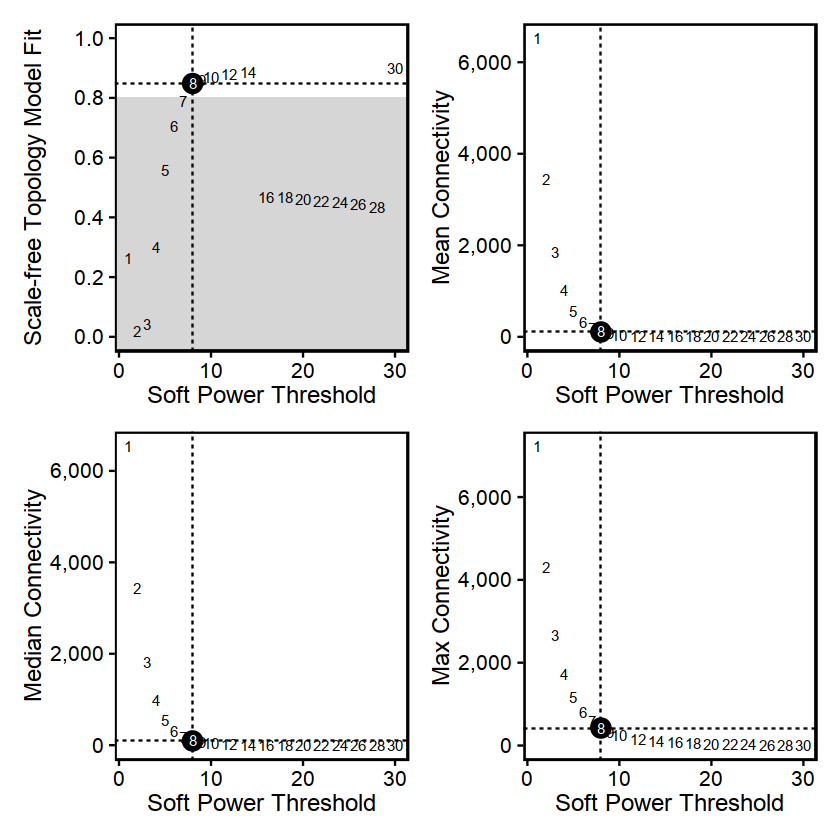

In [12]:
# Test different soft powers:
seurat_obj <- TestSoftPowers(
  seurat_obj,
  networkType = 'signed' # you can also use "unsigned" or "signed hybrid" 是否考虑正负相关
)

# plot the results:
plot_list <- PlotSoftPowers(seurat_obj)

# assemble with patchwork
wrap_plots(plot_list, ncol=2)

In [13]:
power_table <- GetPowerTable(seurat_obj)
head(power_table)

,Power,SFT.R.sq,slope,truncated.R.sq,mean.k.,median.k.,max.k.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.26110351,11.889729,0.9546294,6525.7417,6532.2923,7219.7053
2,2,0.01631495,1.375111,0.9935408,3434.0090,3421.8601,4293.1289
3,3,0.04178826,-1.487314,0.9784280,1840.1686,1817.2352,2651.0575
4,4,0.29769630,-3.249674,0.9588046,1003.7962,978.3657,1719.7194
5,5,0.55846894,-4.060086,0.9617106,557.3639,533.2201,1157.0353
6,6,0.70513240,-4.195496,0.9696135,315.0681,295.1368,804.1011


In [14]:
soft_power <- power_table %>% subset(SFT.R.sq >= 0.8) %>% .$Power %>% min
soft_power

[1] 8

In [15]:
# construct co-expression network:
seurat_obj <- ConstructNetwork(
  seurat_obj, soft_power=9,
  setDatExpr=FALSE,
  tom_name = 'INH', # name of the topoligical overlap matrix written to disk
  overwrite_tom = TRUE 
)

Warning message in ConstructNetwork(seurat_obj, soft_power = 9, setDatExpr = FALSE, :
“Overwriting TOM TOM/INH_TOM.rda”


 Calculating consensus modules and module eigengenes block-wise from all genes
 Calculating topological overlaps block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
    TOM calculation: adjacency..
    ..will use 64 parallel threads.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
 ..Working on block 1 .
 ..Working on block 1 .
 ..merging consensus modules that are too close..


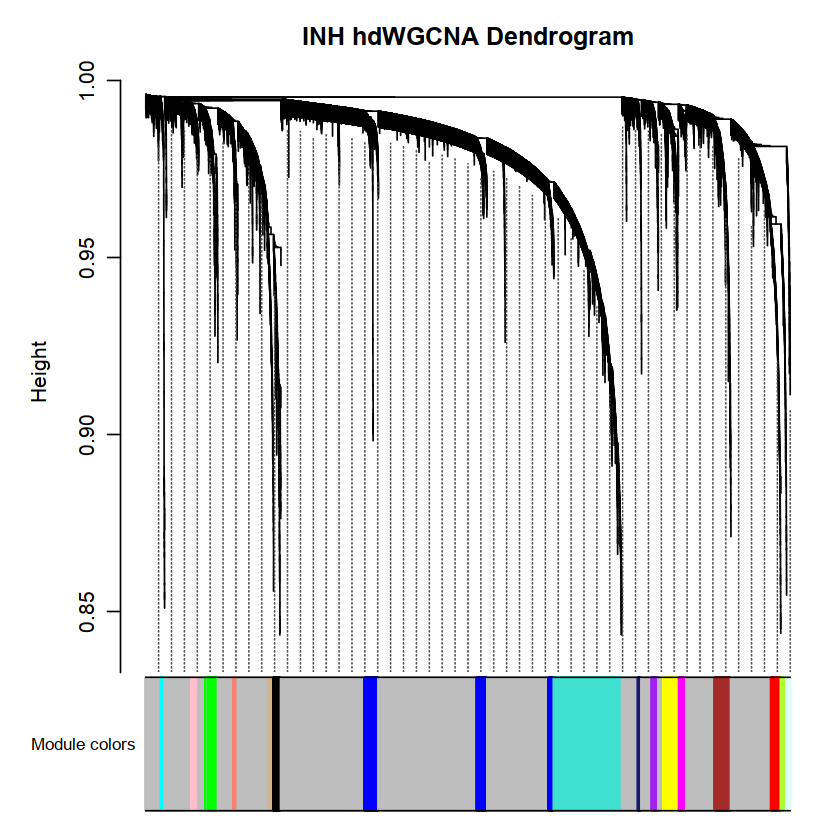

In [16]:
PlotDendrogram(seurat_obj, main='INH hdWGCNA Dendrogram')

In [17]:
TOM <- GetTOM(seurat_obj)

In [18]:
head(TOM)

,AL627309.1,LINC01409,LINC01128,NOC2L,AGRN,C1orf159,SDF4,UBE2J2,SCNN1D,ACAP3,⋯,UTY,NLGN4Y,TTTY14,KDM5D,TTTY10,AL592183.1,AC007325.1,AC007325.2,AL354822.1,AC240274.1
AL627309.1,0.000000000,0.003675380,0.002379541,0.003247764,0.003014661,0.003150475,0.003219730,0.002967473,0.002878997,0.002889922,⋯,0.004935493,0.004356582,0.004531469,0.005227961,0.004169614,0.005123801,0.002675955,0.002937739,0.002496937,0.003355096
LINC01409,0.003675380,0.000000000,0.002404406,0.002031122,0.003023505,0.004421052,0.003086827,0.002164604,0.002690853,0.005045996,⋯,0.004814384,0.004698512,0.004832035,0.004641391,0.004794294,0.006776024,0.002397128,0.002697363,0.002282688,0.002506584
LINC01128,0.002379541,0.002404406,0.000000000,0.007223745,0.003471490,0.003432074,0.003766426,0.004494848,0.002576778,0.003513238,⋯,0.004920328,0.004215246,0.004344139,0.005497261,0.003861993,0.002805220,0.003800226,0.003254759,0.003496298,0.003510658
NOC2L,0.003247764,0.002031122,0.007223745,0.000000000,0.006141515,0.003898408,0.005187202,0.005819923,0.004449457,0.002963013,⋯,0.005700277,0.005213748,0.005288645,0.006796316,0.004806093,0.002270224,0.006213849,0.004812235,0.004873349,0.005723902
AGRN,0.003014661,0.003023505,0.003471490,0.006141515,0.000000000,0.002937733,0.003001025,0.003177846,0.002593943,0.003438166,⋯,0.005197793,0.004320974,0.004535626,0.005665985,0.004053198,0.002497102,0.002836263,0.003056091,0.002595575,0.003622068
C1orf159,0.003150475,0.004421052,0.003432074,0.003898408,0.002937733,0.000000000,0.004664618,0.003667411,0.002645195,0.003567919,⋯,0.006069735,0.005649988,0.005798527,0.006149352,0.005460796,0.004487708,0.002994211,0.002995986,0.002843748,0.003260243


In [19]:
dim(TOM)

[1] 12639 12639

In [21]:
table(seurat_obj@misc$tutorial$wgcna_modules$module)


        grey       yellow         blue midnightblue        brown    turquoise 
        8571          300          588           72          319         1334 
      salmon  greenyellow         pink        green       purple          tan 
          96          112          144          248          133          104 
     magenta    lightcyan        black         cyan          red 
         133           71          145           74          195 

In [22]:
modules <- GetModules(seurat_obj)

In [23]:
head(modules)

,gene_name,module,color
,<chr>,<fct>,<chr>
AL627309.1,AL627309.1,grey,grey
LINC01409,LINC01409,yellow,yellow
LINC01128,LINC01128,grey,grey
NOC2L,NOC2L,grey,grey
AGRN,AGRN,grey,grey
C1orf159,C1orf159,grey,grey


In [35]:
dim(modules)

[1] 12639     3

In [34]:
seurat_obj

An object of class Seurat 
36601 features across 36671 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 2 dimensional reductions calculated: harmony, umap

# Module Eigengenes and Connectivity

In [20]:
# need to run ScaleData first or else harmony throws an error:
seurat_obj <- ScaleData(seurat_obj, features=VariableFeatures(seurat_obj))

# compute all MEs in the full single-cell dataset
seurat_obj <- ModuleEigengenes(
 seurat_obj,
 group.by.vars="Sample"
)

Centering and scaling data matrix



[1] "grey"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagrey to pcagrey_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcagrey_”
pcagrey_ 1 
Positive:  TMEM144, TF, ENPP2, PTGDS, CLMN, AL359091.1, MOG, ERBIN, CLDN11, CREB5 
	   COL4A5, CERCAM, BCAS1, PXK, MOBP, FAM107B, KCNH8, PDE8A, SLC7A14-AS1, ABCA8 
	   ELMO1, ABCA2, SLAIN1, MTUS1, CLDND1, MAN2A1, CNP, LAMP2, VRK2, CNTN2 
Negative:  PLCB1, CSMD1, CACNA1C, FRMPD4, DCLK1, MAP2, PTPRN2, KCNMA1, KCNQ5, SCN2A 
	   GABBR2, GRIN2B, CDH18, HECW1, EFNA5, SNTG1, MRTFB, PAK3, ATP2B2, SCN8A 
	   LINC00599, NRCAM, MIR124-2HG, CACNA1A, KCNJ3, GABRB1, DNM1, KIAA1549L, SYT16, FAM153CP 
pcagrey_ 2 
Positive:  PTPRD, TTLL7, FRMD5, ATP8A1, CNTNAP2, NFASC, MAP7, PTPRK, PPP1R16B, DLG1 
	   AGAP1, IQCJ-SCHIP1, ELMO1, MYO1D, SYNJ2, APBB2, KCNMB4, RNF144A, KIF5C, GNAI1 
	   ABCA2, SLAIN1, 

[1] "yellow"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcayellow to pcayellow_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcayellow_”
pcayellow_ 1 
Positive:  STXBP5L, CACNA1B, MYT1L, ANKRD30BL, GRIN1, SNAP91, BMS1P14, CHD5, CELF5, FP700111.1 
	   ARMC9, VPS13A, KNDC1, PRSS51, DAB1, SIMC1, NEXMIF, LHFPL4, KIAA1549, LINC01278 
	   LINC00632, ZFYVE28, AC092683.2, AP001266.2, LINC02263, ANKRD26, HIVEP3, SPIDR, AL117190.2, LINC01410 
Negative:  C10orf90, UGT8, SLCO1A2, DOCK1, CTNNA3, CDH19, GSN, ERMN, S100B, AASS 
	   C5orf64, RNF130, UACA, AC092958.1, NAIP, ZCCHC24, CNKSR3, CCDC88A, GJB1, KNOP1 
	   NOTCH1, PARP4, FAM227B, GABPB1-AS1, FAM178B, AC002451.1, AC119674.1, LINC02649, ADCY5, JOSD2 
pcayellow_ 2 
Positive:  TLR2, ALPK1, PARP14, RREB1, ARHGAP25, NFATC2, HLA-E, IPCEF1, LIMK2, PBXIP1 
	   LINC02649, SH3BGRL, NBPF10,

[1] "blue"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablue to pcablue_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcablue_”
pcablue_ 1 
Positive:  TMEM165, OCLN, WSB1, RFX3-AS1, ZFYVE16, INPP1, ZKSCAN1, AL359504.2, CLASP2, CIRBP 
	   ZNF280D, ZBED5, ENTPD1-AS1, GANC, LANCL1, AL162253.2, LINC02340, MAT2A, AC104596.1, MRPL48 
	   DDX17, SLC35B3, PPP1R21, RNF13, GSTK1, LRCH3, ADCK1, SEPSECS, THAP6, ADHFE1 
Negative:  MEG3, UNC80, MIAT, AC024901.1, FAM27C, CYP4X1, LINC02398, FAM153A, AEBP2, SLC25A12 
	   PNMA3, MEF2C-AS1, NPM2, ME3, CFAP69, SRGAP3, TTC8, TRMT11, CORO6, SLC35A1 
	   NEIL1, SUGP2, SULT1A1, MYEF2, ZNF382, GPLD1, ARMC2, UPP1, LINC02245, GLMN 
pcablue_ 2 
Positive:  UNC80, MEG3, FAM153A, MEF2C-AS1, PNMA3, AC024901.1, VSTM2A, MIAT, NPM2, FAM27C 
	   ME3, SLC25A12, CYP4X1, LINC02398, SULT1A1, GPLD1, SRGAP3, A

[1] "midnightblue"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcamidnightblue to pcamidnightblue_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcamidnightblue_”
pcamidnightblue_ 1 
Positive:  PLP1, ST18, RNF220, DOCK5, SLC44A1, LINC01608, SHROOM4, CNDP1, FOLH1, FA2H 
	   MAG, GPR37, PLLP, MAL, AC012494.1, AC110285.1, CD9, RFFL, RHOU, TSC22D4 
	   APOD, WHRN, MYRF, GATM, NDRG2, PON2, PLPP2, CYP2J2, KLK6, AL354809.1 
Negative:  AC008696.2, CELF2-DT, BMPR1B, STARD4-AS1, MMD, RBBP8, AMOT, TRIM5, GMNN, SLC35E2A 
	   RASIP1, ASXL2, GASK1B, SLC2A4RG, STYXL1, NBDY, ZNF891, RIT1, ERLIN2, AC009041.2 
	   SRP14-AS1, UBIAD1, AL353688.1, TTYH1, SERTAD2, AL023284.4, ACTL6A, CD226, LRP4-A

[1] "brown"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcabrown to pcabrown_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcabrown_”
pcabrown_ 1 
Positive:  QKI, MBP, SGK1, GPRC5B, SCD, CLIC4, FBXL7, NDRG1, PTBP2, SPOCK1 
	   FMNL2, FAM13C, SLC39A11, DOCK9, NFIA, TXNIP, SGMS1, SH3GL3, LIFR, KLHL4 
	   OLMALINC, IGSF11, DAPK2, LSS, CA2, TBC1D2, AKAP6, MEGF9, UNC5B, PHYHIPL 
Negative:  FGF14, CCSER1, MTUS2, AFF3, RBFOX3, RIMS1, MSRA, CDK14, GRIN2A, FLRT2 
	   TMEM132D, NR2F1-AS1, PHACTR1, CABP1, RIMBP2, CELF4, MACROD2, CHL1, KCNQ3, ATP8A2 
	   SLC2A13, UNC13A, PLXNA2, PDZRN3, PTPRO, UNC13C, GALNT18, DGCR9, AC009899.1, TNR 
pcabrown_ 2 
Positive:  SH3GL3, AKAP6, GAS7, SAMD12, GRIN2A, MBP, PPFIBP1, ATP8A2, DOCK9, CACNA2D1 
	   RBFOX3, SPOCK1, CABP1, MTUS2, AFF3, SGK1, CELF4, NOS1AP, SYNDIG1, RHOBTB1 
	   ADAM22, CCSER1, KLHL

[1] "turquoise"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcaturquoise to pcaturquoise_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcaturquoise_”
pcaturquoise_ 1 
Positive:  GLUL, DNAJC6, MARCKSL1, SHC4, C12orf76, SF1, ENDOD1, APLP1, MAP4, FAM177A1 
	   CFL2, NCOA7, CADM4, B2M, GOLGA7, JPX, COPA, TMX1, PPP4R3B, CD164 
	   FEZ1, IFI27L2, EIF5A2, STMN4, FADS1, HMGN1, C1orf122, TUBA1A, TMEM258, SNHG6 
Negative:  SNAP25, CALM1, UCHL1, HSP90AB1, RAB3A, SNCB, NEFL, ATP6V0C, PCSK1N, ATP1A3 
	   TMEM59L, CALM3, MAP1B, RTN1, ENO2, GAPDH, SYP, CHGA, STMN2, MDH1 
	   ARL6IP1, YWHAG, YWHAH, TUBA1B, CLSTN1, PKM, TSPAN7, IDS, TUBB2A, SERINC1 
pcaturquoise_ 2 
Positive:  GABRG2, PRKAR1B, ST8SIA3, ATCAY, SLC12A5, ELMOD1, RTN1, SYP, LONRF2, SLC6A17 
	   PHYHIP, NDRG4, SV2A, NSG2, MAP1B, CLSTN3, DMTN, ATP1A3, KIAA0513, KIF5A 
	   TMEM130, 

[1] "salmon"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcasalmon to pcasalmon_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcasalmon_”
pcasalmon_ 1 
Positive:  SYT1, GABRB2, SYN2, TMEM132B, RAPGEF4, UNC5D, KCTD16, SHISA9, OSBPL6, MCTP1 
	   CAMK1D, AMPH, GRIP1, CNTN5, PTPRT, PKNOX2, PAK5, AC073050.1, SLC35F1, TENM4 
	   PPP3CA, LIN7A, DOK6, PTCHD4, TRERF1, BRINP2, PRKCE, MPPED1, SGCZ, KCNN2 
Negative:  TCF12, ZNF536, UNC5C, ZSWIM6, IL1RAPL1, KIAA1324L, SSH2, ADAM12, GRID1, ADD3 
	   DSCAML1, PKP4, KIRREL3, ZNF462, RERE, KANSL1L, DGKD, MGAT5, RASSF8, HECW2 
	   MTSS1, TSPAN5, RAB3IP, SLC7A2, MYH9, ZNF827, GOLIM4, MAP3K20, TOX3, VAV3 
pcasalmon_ 2 
Positive:  IL1RAPL1

[1] "greenyellow"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagreenyellow to pcagreenyellow_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcagreenyellow_”
pcagreenyellow_ 1 
Positive:  KALRN, RGS7, GABRB3, NRXN1, LINGO2, CSMD3, PCSK2, DGKB, SORCS1, NEDD4L 
	   GRIA2, PRKCB, ACTN1, NRG1, CCDC85A, HTR1E, AC007563.2, MAGI3, EPHA5, SUSD4 
	   NGEF, TTC39C, PRR16, FRY, AC092691.1, RNF150, TNFRSF25, KCTD1, TCERG1L, FXYD7 
Negative:  ZBTB20, DOCK10, SOX2-OT, CDH20, SLCO3A1, ZFHX4, BAZ2B, EPN2, COBL, FOXO1 
	   NAALADL2, PEX5L, CNTNAP4, GREB1L, MBOAT2, SLC25A48, KIAA1958, ANK3, PREX2, LRIG1 
	   AP1S2, SWAP70, MAML3, NFIB, MN1, PELI2, ZNF765, CLTCL1, MED27, FMNL3 
pcagreenyellow_ 2 
Positive:  ANK3, NECAB1, PEX5L, SLCO3A1, DYNC1I1, PRKCB, CNTNAP4, COBL, NGEF, DOCK10 
	   FXYD7, GREB1L, PCSK2, LINGO2, TCERG1L, NRG1, NFIX, HDAC9, HTR1

[1] "pink"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcapink to pcapink_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcapink_”
pcapink_ 1 
Positive:  LINC02241, SLC22A15, LRRC8D, NUTM2A-AS1, WWOX, LINC00240, WDR70, CRADD, AF165147.1, LHPP 
	   UBE4B, MYO18A, ANK2, CEP128, LINC01473, LINC01182, AL596218.1, ANKMY1, NUBPL, FGGY 
	   OTUD7A, AC007376.2, RNF213, RSRC1, BCAS3, DPH6, BBS9, DIS3L2, NBPF1, TRAPPC9 
Negative:  OPCML, KSR2, SRRM3, SPTBN4, SNHG14, LINC01250, WNK2, DANT2, AC016745.1, FBXL17 
	   AL136317.2, BX664727.3, PATJ, KIAA0825, NME5, CCDC57, CASC15, FBXO16, TNRC6A, ARL15 
	   WDR60, FAM85B, AC124854.1, CCDC3, TMEM266, SLC16A10, NRG2, CCDC30, FTX, RAD9A 
pcapink_ 2 
Positive:  LINC02241, WDR70, OTUD7A, NUTM2A-AS1, WWOX, SLC22A15, BCAS3, FAF1, BBS9, LRRC8D 
	   UBE4B, AF165147.1, FTX, PRKN, LINC01473, CRADD, 

[1] "green"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcagreen to pcagreen_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcagreen_”
pcagreen_ 1 
Positive:  RIMS2, RALYL, THRB, CNTN1, ADGRL2, GRIK2, TMEM178B, CERS6, NETO1, SLC8A1 
	   CTNNA2, PTPRR, KIAA1211L, GPM6A, DAPK1, GRM1, CACNG3, ANO5, CAMK2A, DGKI 
	   FZD3, SMYD3, SYT7, WDR17, RUNDC3B, CBLN2, GAP43, CPNE4, TRHDE, SCN3B 
Negative:  FRMD4B, PHLPP1, TMTC2, LPAR1, FUT8, RBPJ, JAM3, SEMA6A, NEO1, TMCC3 
	   ENOX2, MUSK, DLEU2, FNIP1, EVA1C, FANCL, ANKRD44, MIR100HG, APOLD1, AOX1 
	   LIMCH1, PRTFDC1, RAP1GDS1, ZNF704, TMEFF2, SYNE3, AGPAT4, BACH2, TLL2, FGF1 
pcagreen_ 2 
Positive:  NRXN3, NKAIN2, LIMCH1, ANKS1B, PDE1A, TMEFF2, AGPAT4, JAM3, DMD, NALCN 
	   FRMD4B, REPS2, ANKRD36, FUT8, ZNF704, PHLPP1, LPAR1, TMTC2, FNIP1, FANCL 
	   DGKI, LINC01122, MPDZ, SEMA6A, A

[1] "purple"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcapurple to pcapurple_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcapurple_”
pcapurple_ 1 
Positive:  NEAT1, SIK3, PLD1, EDIL3, KAT2B, CDC14B, SLC25A13, ANO4, TFEB, SNX29 
	   GNG7, ARHGAP22, AP000282.1, ERBB4, AMPD3, PPP1R12B, BARD1, PPARA, PCBP4, LPP 
	   PI4K2B, TTLL9, NOX4, FGD4, SLX4IP, BMP1, AUH, TPRG1, KLHL13, EPHX2 
Negative:  NRG3, MEG8, ASIC2, SRRM4, HS6ST3, NMNAT2, NTRK3, PLXNA4, KCNH7, NOL4 
	   PPM1E, PPFIA4, NEK10, FHOD3, SLIT1, DZIP1, LINC01414, ABLIM2, FBXW7, IQSEC3 
	   COL26A1, RARB, AC096711.2, FAM13A, DLGAP4, SGPP2, RTN4RL1, RIT2, SDK1, LINC00970 
pcapurple_ 2 
Positive:  EDIL3, ANO4, STOX2, KCNK1, PLD1, SRRM4, ABLIM2, KCNH7, NMNAT2, COL26A1 
	   SLIT1, SYT14, SIK3, PPP1R12B, FBXW7, PLXNA4, IQSEC3, ASIC2, SGPP2, PPFIA4 
	   RTN4RL1, LINC00970,

[1] "tan"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcatan to pcatan_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcatan_”
pcatan_ 1 
Positive:  PLCL1, HHATL, PTPN13, SLC9A9, CDK6, ROR1, TRPS1, TAFA4, LINC00894, RHOBTB3 
	   AFF1, TMEM131L, UBE2E2, MEF2A, TEAD1, CEMIP, RNF144B, CPED1, CNTNAP3C, TMEM132C 
	   RUNX2, ANKS1A, MYO5B, RGS5, KCNS3, SLC4A4, RPH3AL, GAS2, CHCHD3, NCK2 
Negative:  FGF12, DLGAP2, KHDRBS2, HCN1, MDGA2, LRRTM4, TAFA2, KCNC2, KCND2, SETBP1 
	   DPP10, LDB2, NAV3, MEF2C, ERC2, RASAL2, TMEM178A, ADCY1, EPHA6, NDST3 
	   KLF12, FAM78B, ZNF385D, SLIT2, ADARB1, WIPF3, MPP7, DRP2, SOX5, SLC26A4 
pcatan_ 2 
Positive:  CNTNAP3B, SLC4A4, CNTNAP3, TRPS1, SLC9A9, SULF1, SOX5, RNF144B, CPED1, AFF1 
	   RUNX2, SAT1, RHOBTB3, ST8SIA4, SFXN5, OSBPL3, CNTNAP3C, TEAD1, TMEM132C, MYO5B 
	   CLEC16A, TRPC4, ZNF385D

[1] "magenta"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcamagenta to pcamagenta_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcamagenta_”
pcamagenta_ 1 
Positive:  JPH4, TARBP1, UPP2, MAP3K21, AL445433.2, LRRN2, AL591519.1, AC079781.5, CCDC171, AL353626.1 
	   CCDC192, LINC00937, AC098588.3, TMEM179, NEK11, AL357153.2, RFLNA, ALG1L9P, SYCE1, RNPC3 
	   TNXB, SLC26A8, ECT2L, PKD1L1, SYCP2L, AC092574.2, XYLB, EPB41L5, FBXL13, CC2D1A 
Negative:  RASGRP3, CPQ, PACS2, SLC4A5, AC109927.1, VPS35L, AC053527.2, P2RX7, GUSB, AP002495.1 
	   MDM4, CEP72, ARHGEF1, SLC13A3, MCM9, NPHP3, SCGB2B2, PPCDC, EFCAB11, KCNQ1 
	   BCL7C, DHRS12, PLAG1, IQCK, NR2C2, AL683813.1, DNHD1, DNAJC27-AS1, WDR59, ZFP14 
pcamagenta_ 2 
Positive:  JPH4, LRRN2, MKNK1, MAP3K21, AL445433.2, AL591519.1, KCNQ1, SYCE1, LINC00937, SLC26A8 
	   UPP2, TMEM179, X

[1] "lightcyan"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcalightcyan to pcalightcyan_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcalightcyan_”
pcalightcyan_ 1 
Positive:  CACNA2D3, CHRM3, ROBO2, KCNB1, RGS6, CACNA1E, MIR137HG, FAT3, KCNB2, CACNB2 
	   BASP1, NELL1, CDH10, CNTN3, GABRA2, GDA, SYNPR, LINC01322, CARMIL1, LINC01197 
	   CREG2, RIPOR2, SHISA6, DGKG, GNG2, BICC1, CHST15, ME1, C2orf80, MRAP2 
Negative:  PDE4B, PDE1C, PALM2-AKAP2, DPYD, SPATA13, NPAS3, NCAM2, MARCH1, PPFIBP2, PLPPR1 
	   SYT9, L3MBTL4, NIPAL3, AUTS2, ARFGEF3, DLG2, ROBO1, ANKRD12, GTF2F2, GPR137C 
	   NOVA1, LINC01102, PANTR1, B4GALT1, AC112695.1, TSBP1-AS1, GRID2, GPRIN3, LINC00290, TNPO1

[1] "black"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcablack to pcablack_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcablack_”
pcablack_ 1 
Positive:  DLGAP1, RBFOX1, FAM155A, GRM5, AGBL4, ATRNL1, SLC4A10, LRFN5, CADPS, TENM2 
	   PCLO, CACNB4, ZNF385B, CELF2, NEGR1, SORBS2, XKR4, ST6GALNAC5, SH3GL2, MMP16 
	   RYR2, PAM, KIAA1217, NCALD, SYBU, GRIA3, AC090578.1, MICAL2, STXBP5-AS1, SATB1-AS1 
Negative:  PIEZO2, MIR181A1HG, SPOCK3, PPP2R2B, SLC24A2, AOPEP, TANC1, FHIT, ST6GALNAC3, SASH1 
	   ELL2, MITF, RAPGEF6, RAPGEF5, STARD9, SFMBT2, PKD2, AC079921.1, MAGI2, STXBP6 
	   DIPK2A, ENOX1, AC104123.1, AKNA, NLK, KLHL5, AL158077.2, NF1, EPB41L4A, ZNF124 
pcablack_ 2 
Positive:  SH3GL2, ANKRD33B, RYR2, MICAL2, RAPGEF5, CUX2, EPHB6, NLK, ST6GALNAC5, ZNF385B 
	   LRFN5, SLC4A10, SYBU, SORBS2, CELF2, AC090578.1, RBFOX1, S

[1] "cyan"


Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcacyan to pcacyan_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcacyan_”
pcacyan_ 1 
Positive:  MT-CO3, MT-CO1, MT-CYB, MT-ND1, MT-ATP6, MT-CO2, MT-ND4L, MT-ND4, MT-ND5, MT-ND3 
	   MTRNR2L12, DHFR, MT-ND2, LINC01320, MTRNR2L1, MTRNR2L8, MT-ATP8, MT-ND6, NPTX1, NCS1 
	   MTRNR2L6, NSF, DGKZ, NEFM, ADGRB1, PDXK, KCNC3, PIP5K1C, LARP1B, AGAP3 
Negative:  PIP4K2A, DIP2C, KMT2C, GAB2, USP47, MYO9B, SRCIN1, XIST, HMGB1, NOL4L 
	   ABHD17A, MCMDC2, ADAP1, HCN2, FBRS, JMJD6, BRSK1, OSBP2, CSMD2, STK40 
	   SRF, CCDC40, CSNK1E, STRN4, MAP2K2, RAB11FIP4, UPF1, BRD4, KDM6B, CBARP 
pcacyan_ 2 
Positive:  PIP4K2A, MTRNR2L1

[1] "red"


Centering and scaling data matrix

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from pcared to pcared_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pcared_”
pcared_ 1 
Positive:  NCKAP5, HIPK2, ARAP2, HIP1, AC008571.2, LINC00844, ARHGAP21, KANK1, AC079352.1, CHD7 
	   CPNE2, FAM126A, SORT1, SH3D19, KCNJ2, SVEP1, CYP27A1, NCAM1, AC087564.1, AC016821.1 
	   OSBPL1A, PROX1, CDK5RAP2, ELN, PPM1H, FAT4, MYLIP, HEPH, DPF3, SALL1 
Negative:  KCNIP4, CNKSR2, DSCAM, NELL2, GALNT17, GRM7, OLFM3, CIT, EPHA4, CAMK4 
	   SYNE1, ARPP21, LRFN2, NIPAL2, BRINP1, GALNTL6, SEZ6L, SORCS3, KCNT2, AC124852.1 
	   TMEM232, UNC5A, PTK2B, REEP1, NPAS2, ENC1, LARGE1, DIRC3, ROCK2, NPY1R 
pcared_ 2 
Positive:  PARD3, HIF3A, RYR3, LRRC3B, C3orf70, MAPK4, AL589740.1, AC114971.1, ARHGAP24, EMID1 
	   PDE7B, MIR99AHG, IL17RB, DPYSL3, HAP1, RXRA, ZFHX3, PDE3A, NCOA1, COL21A1 
	   F

In [21]:
# harmonized module eigengenes:
hMEs <- GetMEs(seurat_obj)

# module eigengenes:
MEs <- GetMEs(seurat_obj, harmonized=TRUE)

mods <- colnames(MEs); mods <- mods[mods != 'grey']

In [22]:
# compute eigengene-based connectivity (kME):
seurat_obj <- ModuleConnectivity(
  seurat_obj,
  group.by = 'cell_type', group_name = 'INH'
)

In [23]:
# rename the modules
seurat_obj <- ResetModuleNames(
  seurat_obj,
  new_name = "INH-M"
)

In [37]:
options(repr.plot.width=20, repr.plot.height=10)

[1] "INH-M1"
[1] "INH-M2"
[1] "INH-M3"
[1] "INH-M4"
[1] "INH-M5"
[1] "INH-M6"
[1] "INH-M7"
[1] "INH-M8"
[1] "INH-M9"
[1] "INH-M10"
[1] "INH-M11"
[1] "INH-M12"
[1] "INH-M13"
[1] "INH-M14"
[1] "INH-M15"
[1] "INH-M16"
[1] "INH-M1"
[1] "INH-M2"
[1] "INH-M3"
[1] "INH-M4"
[1] "INH-M5"
[1] "INH-M6"
[1] "INH-M7"
[1] "INH-M8"
[1] "INH-M9"
[1] "INH-M10"
[1] "INH-M11"
[1] "INH-M12"
[1] "INH-M13"
[1] "INH-M14"
[1] "INH-M15"
[1] "INH-M16"


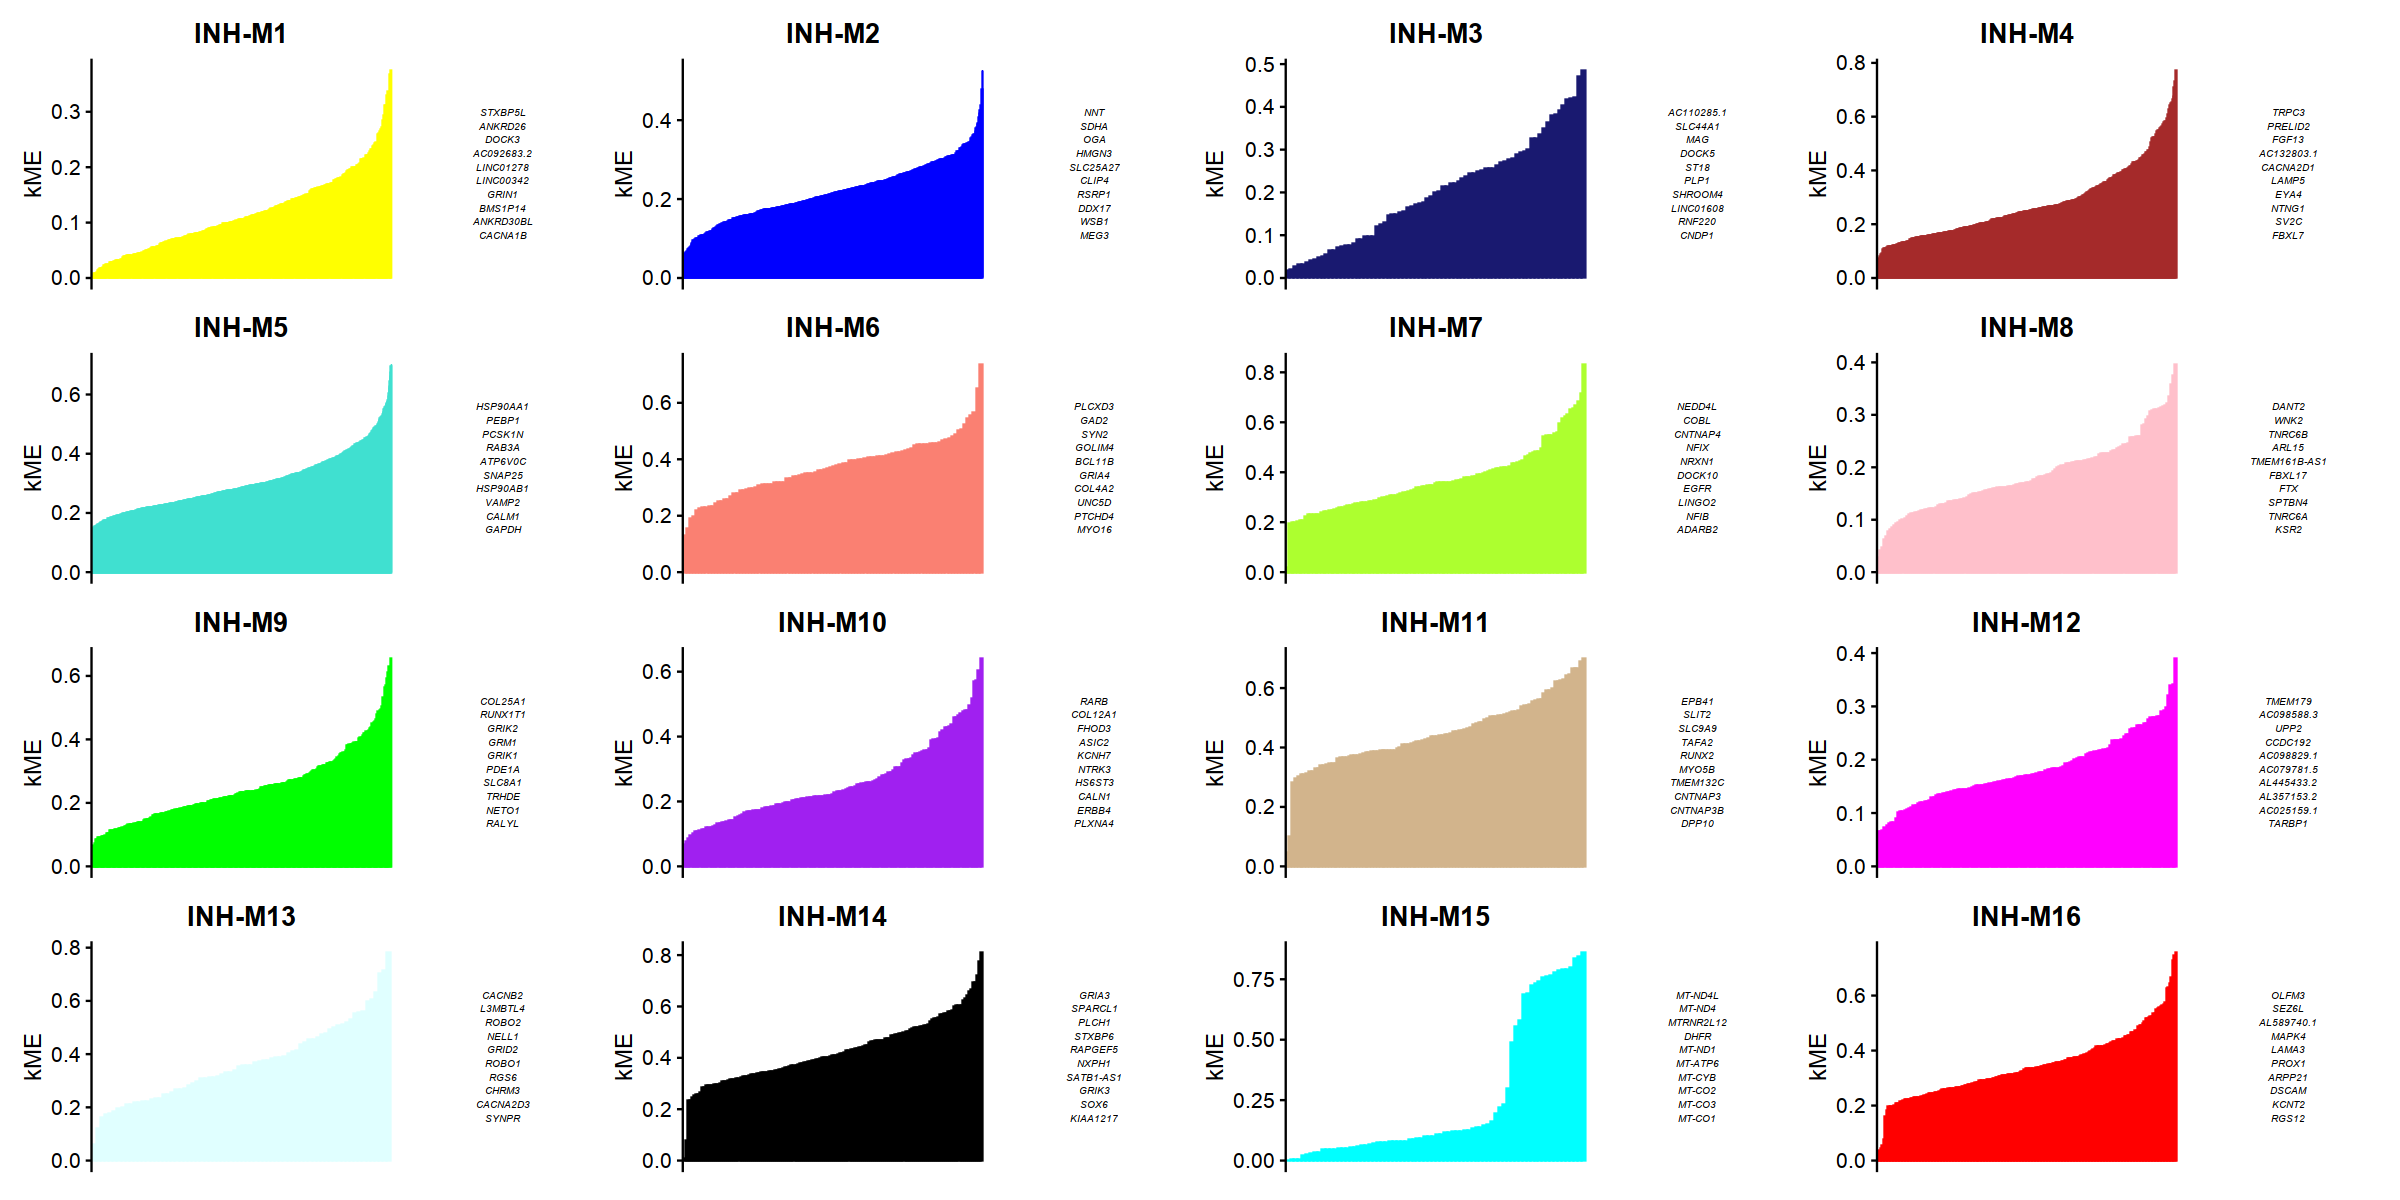

In [38]:
# plot genes ranked by kME for each module
p <- PlotKMEs(seurat_obj, ncol=4)

p

In [25]:
modules <- GetModules(seurat_obj)

In [26]:
head(modules)

,gene_name,module,color,kME_grey,kME_INH-M1,kME_INH-M2,kME_INH-M3,kME_INH-M4,kME_INH-M5,kME_INH-M6,kME_INH-M7,kME_INH-M8,kME_INH-M9,kME_INH-M10,kME_INH-M11,kME_INH-M12,kME_INH-M13,kME_INH-M14,kME_INH-M15,kME_INH-M16
,<chr>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL627309.1,AL627309.1,grey,grey,0.07143410,0.02664530,0.07310351,0.0381544238,0.04550408,0.031620970,0.04039261,0.032652086,0.06837256,0.03881965,0.026576516,0.0298099966,0.07232051,0.008111570,0.032316164,-0.03359988,0.001655406
LINC01409,LINC01409,INH-M1,yellow,0.06150922,0.14119630,0.04451752,0.0002353916,0.05180871,-0.036048456,0.07012450,0.006889413,0.10994173,0.08721524,0.009294651,0.0449371110,0.06645399,0.008045711,0.075136792,-0.03911361,-0.031837730
LINC01128,LINC01128,grey,grey,0.15356435,0.03261928,0.12758126,0.0080951062,0.01350396,0.119466768,0.01279676,0.034834470,0.08683150,0.06699043,0.081578889,0.0295590362,0.07481548,0.083518528,0.044144508,0.04343506,0.068817912
NOC2L,NOC2L,grey,grey,0.13898782,-0.01508379,0.15113367,0.0034728449,0.01034802,0.175879618,0.02393601,0.012618343,0.05052917,0.02402294,0.065866538,0.0338963253,0.05052106,0.032718835,0.019352912,0.01722210,0.042117420
AGRN,AGRN,grey,grey,0.06804258,0.06404746,0.05734999,0.0323085096,0.06726626,0.046119429,0.03303661,0.049172576,0.05461165,0.11231027,-0.020075535,-0.0175423204,0.06968823,0.056979073,0.048458301,-0.01459804,-0.007132611
C1orf159,C1orf159,grey,grey,0.03556049,0.02634476,0.02663075,0.0087798930,0.01373526,0.003594442,0.00389988,0.029459937,0.04438089,0.02534771,0.019756461,-0.0008274646,0.03816243,0.026531634,0.003311652,-0.01766304,0.015396689


In [27]:
# get hub genes
hub_df <- GetHubGenes(seurat_obj, n_hubs = 10)

head(hub_df)

,gene_name,module,kME
,<chr>,<fct>,<dbl>
1,STXBP5L,INH-M1,0.2686087
2,ANKRD26,INH-M1,0.2719833
3,DOCK3,INH-M1,0.2837355
4,AC092683.2,INH-M1,0.2938155
5,LINC01278,INH-M1,0.3105850
6,LINC00342,INH-M1,0.3106208


In [28]:
# compute gene scoring for the top 25 hub genes by kME for each module
# with Seurat method
seurat_obj <- ModuleExprScore(
  seurat_obj,
  n_genes = 25,
  method='Seurat'
)

# compute gene scoring for the top 25 hub genes by kME for each module
# with UCell method
library(UCell)
seurat_obj <- ModuleExprScore(
  seurat_obj,
  n_genes = 25,
  method='UCell'
)

Selecting by kME_INH-M1
Selecting by kME_INH-M2
Selecting by kME_INH-M3
Selecting by kME_INH-M4
Selecting by kME_INH-M5
Selecting by kME_INH-M6
Selecting by kME_INH-M7
Selecting by kME_INH-M8
Selecting by kME_INH-M9
Selecting by kME_INH-M10
Selecting by kME_INH-M11
Selecting by kME_INH-M12
Selecting by kME_INH-M13
Selecting by kME_INH-M14
Selecting by kME_INH-M15
Selecting by kME_INH-M16


ERROR: Error in library(UCell): there is no package called ‘UCell’


In [40]:
options(repr.plot.width=10, repr.plot.height=10)

[1] "INH-M1"
[1] "INH-M2"
[1] "INH-M3"
[1] "INH-M4"
[1] "INH-M5"
[1] "INH-M6"
[1] "INH-M7"
[1] "INH-M8"
[1] "INH-M9"
[1] "INH-M10"
[1] "INH-M11"
[1] "INH-M12"
[1] "INH-M13"
[1] "INH-M14"
[1] "INH-M15"
[1] "INH-M16"


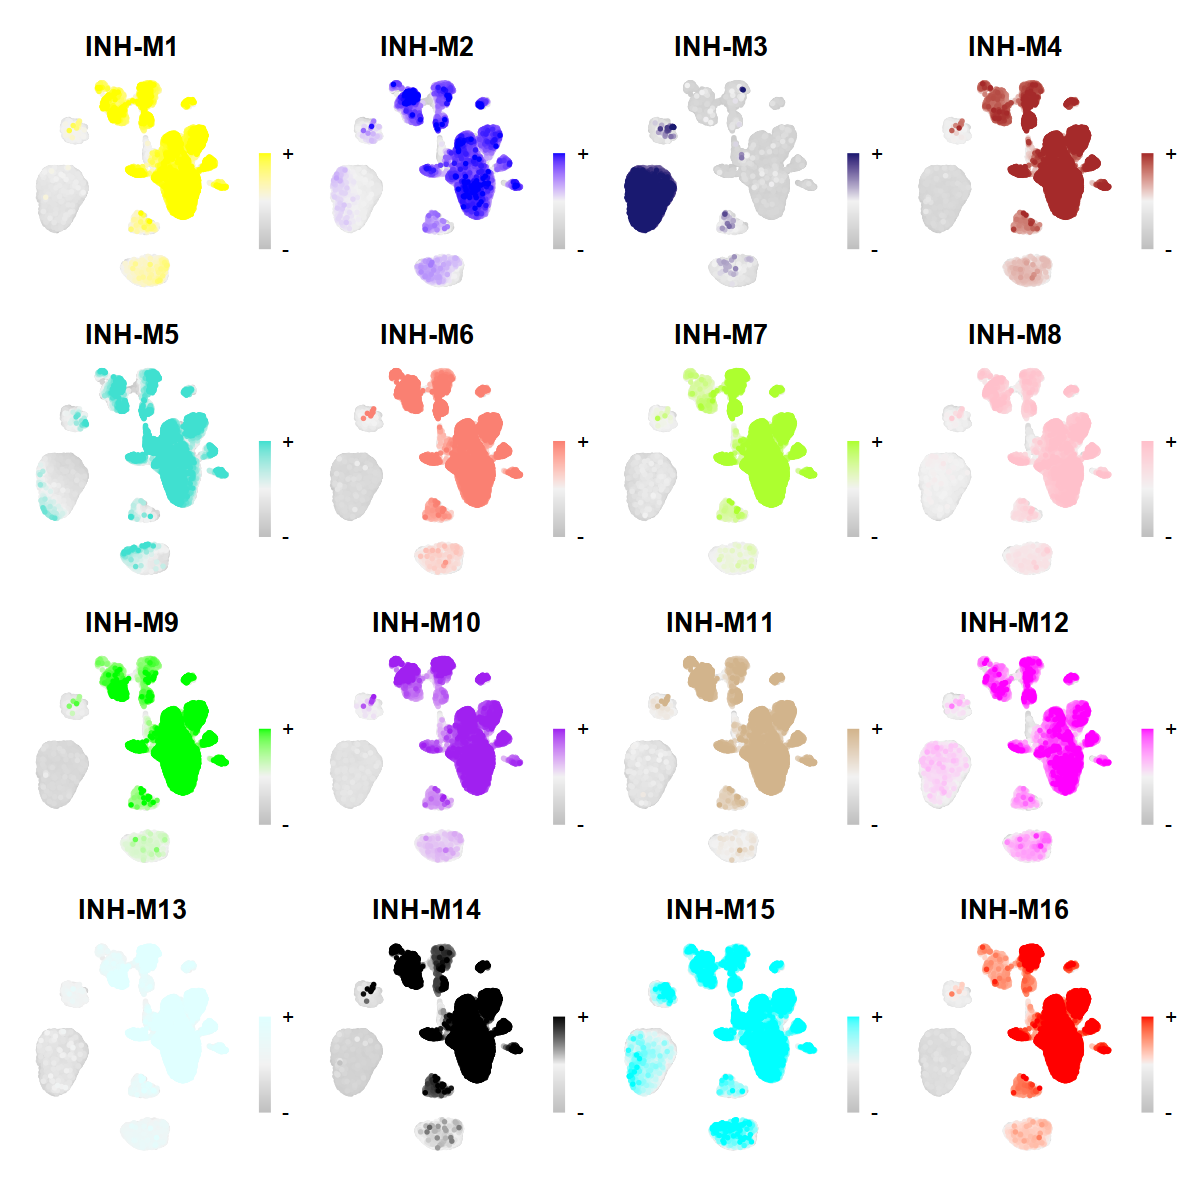

In [41]:
# make a featureplot of hMEs for each module
plot_list <- ModuleFeaturePlot(
  seurat_obj,
  features='hMEs', # plot the hMEs
  order=TRUE # order so the points with highest hMEs are on top
)

# stitch together with patchwork
wrap_plots(plot_list, ncol=4)

In [30]:
# make a featureplot of hub scores for each module
plot_list <- ModuleFeaturePlot(
  seurat_obj,
  features='scores', # plot the hub gene scores
  order='shuffle' # order so cells are shuffled
  ucell = TRUE # depending on Seurat vs UCell for gene scoring
)

# stitch together with patchwork
wrap_plots(plot_list, ncol=6)

ERROR: Error in parse(text = x, srcfile = src): <text>:6:3: unexpected symbol
5:   order='shuffle' # order so cells are shuffled
6:   ucell
     ^


In [31]:
# get hMEs from seurat object
MEs <- GetMEs(seurat_obj, harmonized=TRUE)
mods <- colnames(MEs); mods <- mods[mods != 'grey']

# add hMEs to Seurat meta-data:
seurat_obj@meta.data <- cbind(seurat_obj@meta.data, MEs)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


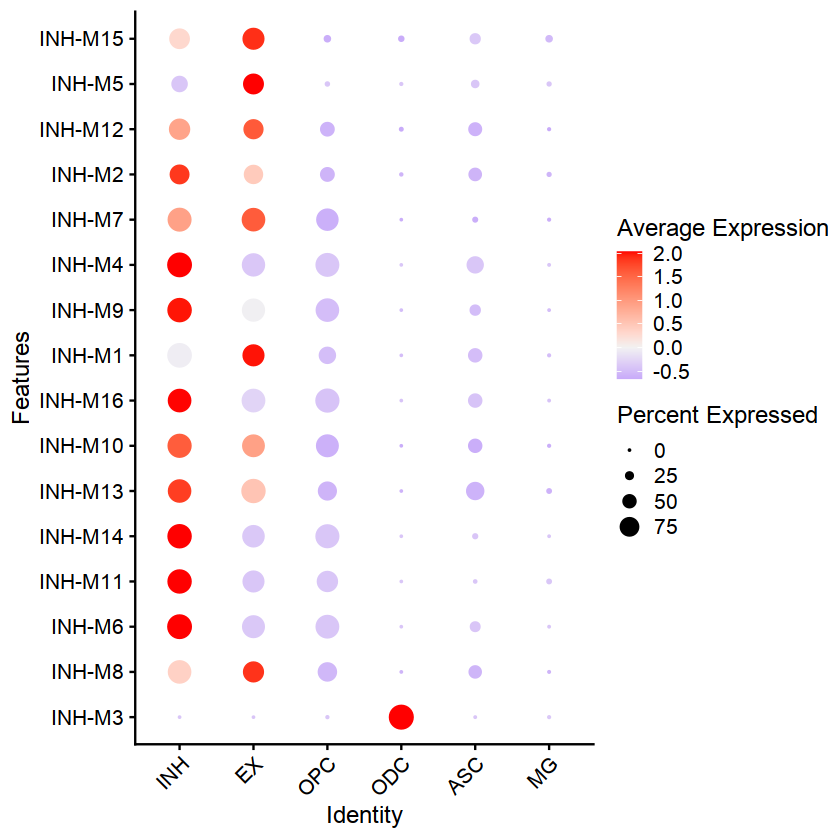

In [32]:
# plot with Seurat's DotPlot function
p <- DotPlot(seurat_obj, features=mods, group.by = 'cell_type')

# flip the x/y axes, rotate the axis labels, and change color scheme:
p <- p +
  coord_flip() +
  RotatedAxis() +
  scale_color_gradient2(high='red', mid='grey95', low='blue')

# plot output
p

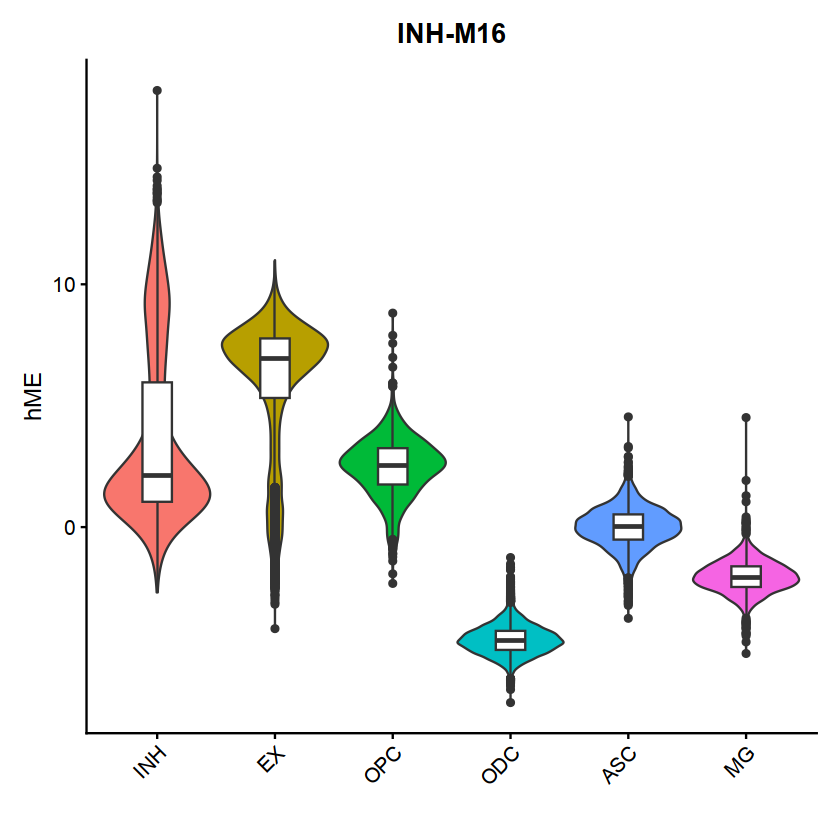

In [34]:
# Plot INH-M4 hME using Seurat VlnPlot function
p <- VlnPlot(
  seurat_obj,
  features = 'INH-M16',
  group.by = 'cell_type',
  pt.size = 0 # don't show actual data points
)

# add box-and-whisker plots on top:
p <- p + geom_boxplot(width=.25, fill='white')

# change axis labels and remove legend:
p <- p + xlab('') + ylab('hME') + NoLegend()

# plot output
p